# BLE Proximity Experiment - SVM Classifier
## Experiment based on the measurements of the BLE RSSI values according to the distance to the BLE Estimote beacon

### Imports
Imports of required libraries

In [1]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
import sklearn
import scipy

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
from pandas.plotting import scatter_matrix

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

<Figure size 432x288 with 0 Axes>

### Load File
Function that allows to load a file from disk

In [2]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

### Replace 0 with Nan RSSI Values

In [3]:
def replace_features_nan(dataset):
    dataset['rssi_Value'] = dataset['rssi_Value'].replace(0,np.nan)
    dataset['rolling_mean_rssi'] = dataset['rolling_mean_rssi'].replace(0,np.nan)

### Initialize Dataset
Initialization of the data from the file

In [4]:
dataset = load_file('../../dataset_train_university.csv')
positions = dataset['coordinate_Y']
dataset['distance'] = positions
replace_features_nan(dataset)
display(dataset)
display(dataset.shape)

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,zone,distance
0,0.0,0.0,-48,-48.000000,Personal,0.0
1,0.0,0.0,-48,-48.000000,Personal,0.0
2,0.0,0.0,-48,-48.000000,Personal,0.0
3,0.0,0.0,-48,-48.000000,Personal,0.0
4,0.0,0.0,-46,-47.600000,Personal,0.0
...,...,...,...,...,...,...
24829,0.0,4.5,-92,-90.480000,Public,4.5
24830,0.0,4.5,-93,-90.576923,Public,4.5
24831,0.0,4.5,-90,-90.555556,Public,4.5
24832,0.0,4.5,-90,-90.535714,Public,4.5


(24834, 6)

### Initialize Test Set

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,zone,distance
0,0.0,4.5,-86,-86.000000,Public,4.5
1,0.0,4.5,-84,-85.000000,Public,4.5
2,0.0,4.5,-83,-84.333333,Public,4.5
3,0.0,4.5,-84,-84.250000,Public,4.5
4,0.0,4.5,-92,-85.800000,Public,4.5
...,...,...,...,...,...,...
3672,0.0,0.0,-57,-56.814815,Personal,0.0
3673,0.0,0.0,-56,-56.785714,Personal,0.0
3674,0.0,0.0,-56,-56.758621,Personal,0.0
3675,0.0,0.0,-56,-56.733333,Personal,0.0


(3677, 6)

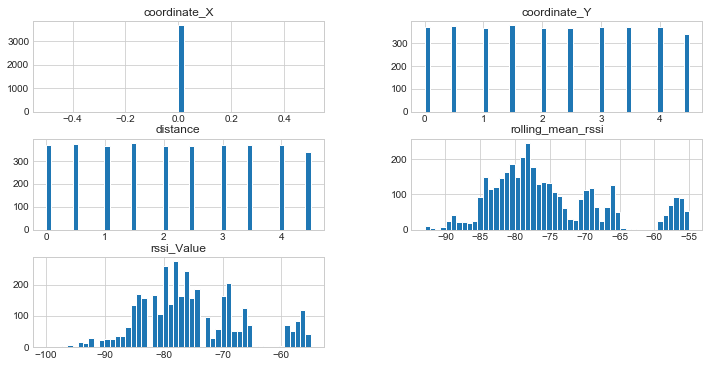

In [5]:
test_dataset = load_file('../../dataset_test_university.csv')
positions = test_dataset['coordinate_Y']
test_dataset['distance'] = positions
replace_features_nan(test_dataset)
display(test_dataset)
display(test_dataset.shape)
test_dataset.hist(bins=50,figsize=(12,6))
plt.show()

### Initialize Test Set (HOME | BIG DATASET SAMSUNG)

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,zone,distance
0,0.0,0.0,-47,-47.000000,Personal,0.0
1,0.0,0.0,-46,-46.500000,Personal,0.0
2,0.0,0.0,-46,-46.333333,Personal,0.0
3,0.0,0.0,-47,-46.500000,Personal,0.0
4,0.0,0.0,-47,-46.600000,Personal,0.0
...,...,...,...,...,...,...
12470,0.0,3.5,-87,-84.555556,Social,3.5
12471,0.0,3.5,-87,-84.684211,Social,3.5
12472,0.0,3.5,-87,-84.800000,Social,3.5
12473,0.0,3.5,-87,-84.904762,Social,3.5


(12475, 6)

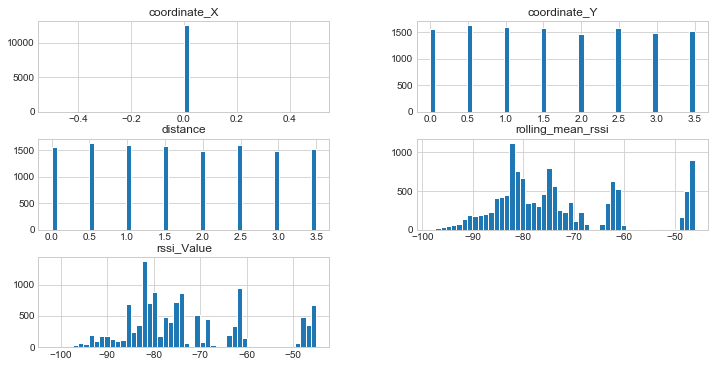

In [6]:
test_dataset_home_big = load_file('../../dataset_test_home_big.csv')
positions = test_dataset_home_big['coordinate_Y']
test_dataset_home_big['distance'] = positions
replace_features_nan(test_dataset_home_big)
display(test_dataset_home_big)
display(test_dataset_home_big.shape)
test_dataset_home_big.hist(bins=50,figsize=(12,6))
plt.show()

### Initialize Test Set (HOME | SMALL DATASET SAMSUNG)

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,zone,distance
0,0.0,0.0,-44,-44.000000,Personal,0.0
1,0.0,0.0,-44,-44.000000,Personal,0.0
2,0.0,0.0,-44,-44.000000,Personal,0.0
3,0.0,0.0,-44,-44.000000,Personal,0.0
4,0.0,0.0,-45,-44.200000,Personal,0.0
...,...,...,...,...,...,...
2279,0.0,3.5,-84,-83.944444,Social,3.5
2280,0.0,3.5,-85,-84.000000,Social,3.5
2281,0.0,3.5,-85,-84.050000,Social,3.5
2282,0.0,3.5,-92,-84.428571,Social,3.5


(2284, 6)

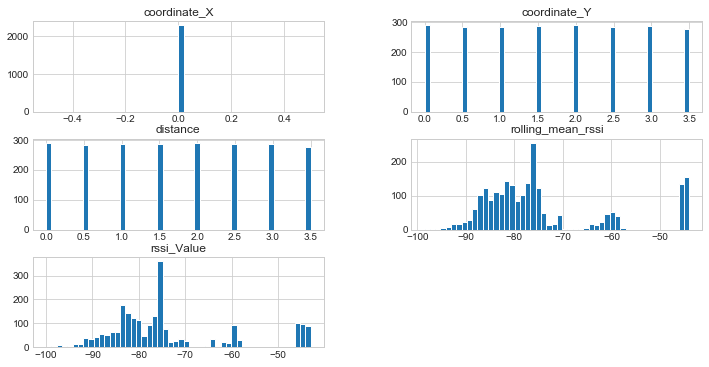

In [7]:
test_dataset_home_small = load_file('../../dataset_test_home.csv')
positions = test_dataset_home_small['coordinate_Y']
test_dataset_home_small['distance'] = positions
replace_features_nan(test_dataset_home_small)
display(test_dataset_home_small)
display(test_dataset_home_small.shape)
test_dataset_home_small.hist(bins=50,figsize=(12,6))
plt.show()

### Initialize Test Set (HOME | SMALL DATASET ASUS)

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,zone,distance
0,0.0,0.0,-50,-50.000000,Personal,0.0
1,0.0,0.0,-50,-50.000000,Personal,0.0
2,0.0,0.0,-53,-51.000000,Personal,0.0
3,0.0,0.0,-51,-51.000000,Personal,0.0
4,0.0,0.0,-53,-53.000000,Personal,0.0
...,...,...,...,...,...,...
410,0.0,3.5,-86,-83.800000,Social,3.5
411,0.0,3.5,-88,-84.500000,Social,3.5
412,0.0,3.5,-84,-84.428571,Social,3.5
413,0.0,3.5,-83,-84.250000,Social,3.5


(415, 6)

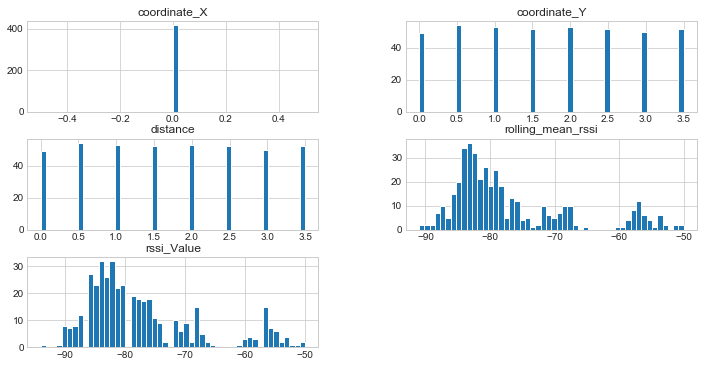

In [8]:
test_dataset_home_asus = load_file('../../dataset_test_home_asus.csv')
positions = test_dataset_home_asus['coordinate_Y']
test_dataset_home_asus['distance'] = positions
replace_features_nan(test_dataset_home_asus)
display(test_dataset_home_asus)
display(test_dataset_home_asus.shape)
test_dataset_home_asus.hist(bins=50,figsize=(12,6))
plt.show()

### Dataset Overall Info

In [9]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24834 entries, 0 to 24833
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   coordinate_X       24834 non-null  float64
 1   coordinate_Y       24834 non-null  float64
 2   rssi_Value         24834 non-null  int64  
 3   rolling_mean_rssi  24834 non-null  float64
 4   zone               24834 non-null  object 
 5   distance           24834 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.1+ MB


None

### File Overall Description
Usage of describe pandas function on the dataset

In [10]:
display(dataset.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
coordinate_X,24834.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
coordinate_Y,24834.0,2.210196,1.436557,0.0,1.000000,2.0,3.500000,4.5
rssi_Value,24834.0,-76.687243,11.255077,-102.0,-84.000000,-78.0,-73.000000,-46.0
rolling_mean_rssi,24834.0,-76.677952,10.969519,-99.0,-83.666667,-78.5,-73.767308,-46.0
distance,24834.0,2.210196,1.436557,0.0,1.000000,2.0,3.500000,4.5


### % of Missing Values

In [11]:
def compute_missing_values(dataset): 
    missing_values = dataset.isnull().sum()
    missing_values_dataset = pd.DataFrame(missing_values,columns=['Missing Values'])
    missing_percentage = (dataset.isnull().sum() / dataset.count())
    missing_percentage_dataset = pd.DataFrame(missing_percentage,columns=['% of Missing Values'])
    missing_dataset = missing_values_dataset.join(missing_percentage_dataset)
    display(missing_dataset)

In [12]:
compute_missing_values(dataset)

,Missing Values,% of Missing Values
coordinate_X,0,0.0
coordinate_Y,0,0.0
rssi_Value,0,0.0
rolling_mean_rssi,0,0.0
zone,0,0.0
distance,0,0.0


### Overall Histogram of dataset atributes

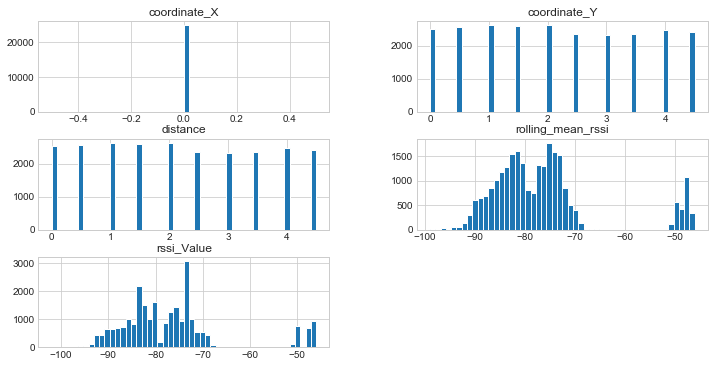

In [13]:
dataset.hist(bins=50,figsize=(12,6))
plt.show()

### Target Attribute - Zone
Graphical display of the zones scanned in the experiment

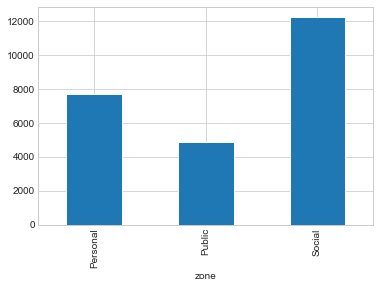

In [14]:
reference_points = dataset.groupby(['zone'])
reference_points.size().plot(kind="bar")

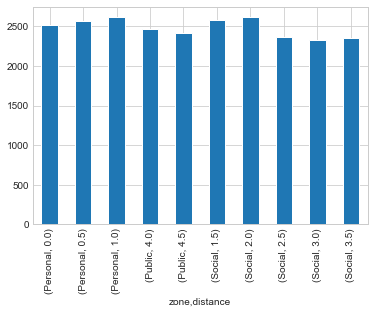

In [15]:
reference_points = dataset.groupby(['zone','distance'])
reference_points.size().plot(kind="bar")

### Beacon RSSI Display
Graphical display of the rssi values recorded at each position

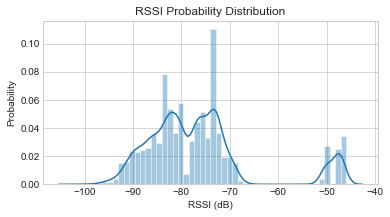

In [16]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')

sns.distplot(dataset['rssi_Value'])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Beacon Rolling Mean RSSI Display
Graphical adisplay of the rolling mean value recorded at each position

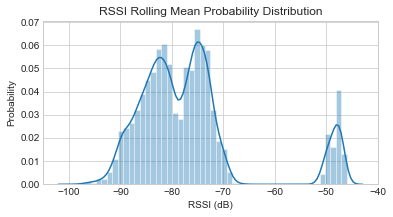

In [17]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Rolling Mean Probability Distribution')
# The KDE plot for the Rolling Mean column
sns.distplot(dataset['rolling_mean_rssi'])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Graphical Display of RSSI/Rolling Mean Distribution
Graphical display of the previous measures - rssi and rolling mean

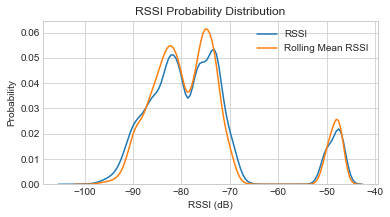

In [18]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')
# The KDE plot for the RSSI column
sns.kdeplot(dataset['rssi_Value'], label='RSSI')
# The KDE plot for the Rolling Mean column
sns.kdeplot(dataset['rolling_mean_rssi'], label='Rolling Mean RSSI')
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Correlations
Check how much each attribute collerates with each other. Valures frange from -1 to 1. Close to 1 means a strong positive correlation.

In [19]:
def compute_correlations(dataset):
    corr_matrix = dataset.corr()
    display(corr_matrix)
    display(corr_matrix['distance'].sort_values(ascending=False))
    attributes = ["distance","rssi_Value", "rolling_mean_rssi"]
    scatter_matrix(dataset[attributes], figsize=(12, 8))

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,distance
coordinate_X,NaN,NaN,NaN,NaN,NaN
coordinate_Y,NaN,1.000000,-0.723705,-0.741381,1.000000
rssi_Value,NaN,-0.723705,1.000000,0.958999,-0.723705
rolling_mean_rssi,NaN,-0.741381,0.958999,1.000000,-0.741381
distance,NaN,1.000000,-0.723705,-0.741381,1.000000


distance             1.000000
coordinate_Y         1.000000
rssi_Value          -0.723705
rolling_mean_rssi   -0.741381
coordinate_X              NaN
Name: distance, dtype: float64

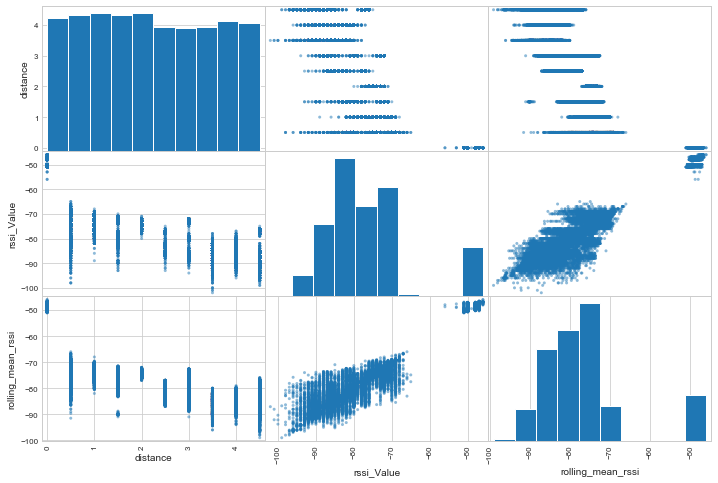

In [20]:
compute_correlations(dataset)

### Data Cleaning
Fill in missing values and fix/remove outliers

In [21]:
def compute_data_cleaning(dataset,feature):
    nan_filler = dataset[feature].min()*1.010
    dataset[feature] = dataset[feature].fillna(nan_filler) # Fill missing values

In [22]:
compute_data_cleaning(dataset,'rssi_Value')
compute_data_cleaning(dataset,'rolling_mean_rssi')
compute_data_cleaning(test_dataset,'rssi_Value')
compute_data_cleaning(test_dataset,'rolling_mean_rssi')
compute_data_cleaning(test_dataset_home_big,'rssi_Value')
compute_data_cleaning(test_dataset_home_big,'rolling_mean_rssi')
compute_data_cleaning(test_dataset_home_small,'rssi_Value')
compute_data_cleaning(test_dataset_home_small,'rolling_mean_rssi')
compute_data_cleaning(test_dataset_home_asus,'rssi_Value')
compute_data_cleaning(test_dataset_home_asus,'rolling_mean_rssi')

### Dealing with Categorical Data
Using Hot-Encoder or Label Encoder to convert text/categorical data into numerical data. ML algorithms prefer it

In [23]:
label_encoder = LabelEncoder()
def compute_encoder(categorical_data,flag):
    if flag == 0:
        labels = label_encoder.fit_transform(categorical_data)
    else:
        labels = label_encoder.transform(categorical_data)
    return labels

In [24]:
categorical_zone = dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
zone_changed = compute_encoder(categorical_zone,0)
print("After One Hot Encoder")
dataset['labels'] = zone_changed
train_Y = dataset['labels'].values.reshape(-1,1)
display(train_Y)

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
24829,Public
24830,Public
24831,Public
24832,Public


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [25]:
categorical_zone = test_dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
test_changed = compute_encoder(categorical_zone,1)
print("After One Hot Encoder")
test_dataset['labels'] = test_changed
test_Y = test_dataset['labels'].values.reshape(-1,1)
display(test_Y.shape)

Previous Categorical Data


,zone
0,Public
1,Public
2,Public
3,Public
4,Public
...,...
3672,Personal
3673,Personal
3674,Personal
3675,Personal


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(3677, 1)

In [26]:
categorical_zone = test_dataset_home_big[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
test_changed = compute_encoder(categorical_zone,1)
print("After One Hot Encoder")
test_dataset_home_big['labels'] = test_changed
test_Y_home_big = test_dataset_home_big['labels'].values.reshape(-1,1)
display(test_Y_home_big.shape)

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
12470,Social
12471,Social
12472,Social
12473,Social


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(12475, 1)

In [27]:
categorical_zone = test_dataset_home_small[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
test_changed = compute_encoder(categorical_zone,1)
print("After One Hot Encoder")
test_dataset_home_small['labels'] = test_changed
test_Y_home_small = test_dataset_home_small['labels'].values.reshape(-1,1)
display(test_Y_home_small.shape)

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
2279,Social
2280,Social
2281,Social
2282,Social


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(2284, 1)

In [28]:
categorical_zone = test_dataset_home_asus[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
test_changed = compute_encoder(categorical_zone,1)
print("After One Hot Encoder")
test_dataset_home_asus['labels'] = test_changed
test_Y_home_asus = test_dataset_home_asus['labels'].values.reshape(-1,1)
display(test_Y_home_asus.shape)

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
410,Social
411,Social
412,Social
413,Social


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(415, 1)

### Initialize Training Data
Training Data intialization for predictions purposes

In [29]:
train_X_rssi = pd.DataFrame(dataset['rssi_Value']).values.reshape(-1,1)
display(train_X_rssi.shape)
train_X_rolling_mean = pd.DataFrame(dataset['rolling_mean_rssi']).values.reshape(-1,1)
display(train_X_rolling_mean.shape)
combination_features_X = dataset[['rssi_Value','rolling_mean_rssi']]
display(combination_features_X.shape)

(24834, 1)

(24834, 1)

(24834, 2)

In [30]:
data_plot_means = dataset.groupby(['zone'])[['rssi_Value','rolling_mean_rssi']].mean()
display(data_plot_means)

,rssi_Value,rolling_mean_rssi
zone,,
Personal,-66.101350,-66.075278
Public,-84.953374,-84.856790
Social,-80.050008,-80.086162


### Plot Training Data
Graphical Display of the observations in the dataset

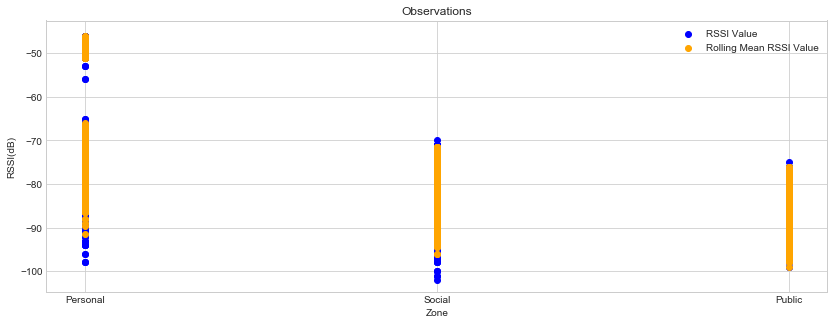

In [31]:
plt.figure(figsize=(14,5))
plt.scatter(dataset['zone'],dataset['rssi_Value'],label='RSSI Value',color='blue')
plt.scatter(dataset['zone'],dataset['rolling_mean_rssi'],label='Rolling Mean RSSI Value',color='orange')
plt.title('Observations')  
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

### Initialize Test Data

In [32]:
test_X_rssi = pd.DataFrame(test_dataset['rssi_Value']).values.reshape(-1,1)
display(test_X_rssi.shape)
test_X_rolling_mean = pd.DataFrame(test_dataset['rolling_mean_rssi']).values.reshape(-1,1)
display(test_X_rolling_mean.shape)
test_combination_features_X = test_dataset[['rssi_Value','rolling_mean_rssi']]
display(test_combination_features_X.shape)

(3677, 1)

(3677, 1)

(3677, 2)

In [33]:
data_plot_means = test_dataset.groupby(['zone'])[['rssi_Value','rolling_mean_rssi']].mean()
display(data_plot_means)

,rssi_Value,rolling_mean_rssi
zone,,
Personal,-66.634563,-66.593533
Public,-81.438819,-81.521907
Social,-78.235580,-78.069045


In [34]:
test_X_rssi_home_big = pd.DataFrame(test_dataset_home_big['rssi_Value']).values.reshape(-1,1)
display(test_X_rssi_home_big.shape)
test_X_rolling_mean_home_big = pd.DataFrame(test_dataset_home_big['rolling_mean_rssi']).values.reshape(-1,1)
display(test_X_rolling_mean_home_big.shape)
test_combination_features_X_home_big = test_dataset_home_big[['rssi_Value','rolling_mean_rssi']]
display(test_combination_features_X_home_big.shape)

(12475, 1)

(12475, 1)

(12475, 2)

In [35]:
data_plot_means = test_dataset_home_big.groupby(['zone'])[['rssi_Value','rolling_mean_rssi']].mean()
display(data_plot_means)

,rssi_Value,rolling_mean_rssi
zone,,
Personal,-60.626277,-60.688594
Social,-81.402474,-81.424138


In [36]:
test_X_rssi_home_small = pd.DataFrame(test_dataset_home_small['rssi_Value']).values.reshape(-1,1)
display(test_X_rssi_home_small.shape)
test_X_rolling_mean_home_small = pd.DataFrame(test_dataset_home_small['rolling_mean_rssi']).values.reshape(-1,1)
display(test_X_rolling_mean_home_small.shape)
test_combination_features_X_home_small = test_dataset_home_small[['rssi_Value','rolling_mean_rssi']]
display(test_combination_features_X_home_small.shape)

(2284, 1)

(2284, 1)

(2284, 2)

In [37]:
data_plot_means = test_dataset_home_small.groupby(['zone'])[['rssi_Value','rolling_mean_rssi']].mean()
display(data_plot_means)

,rssi_Value,rolling_mean_rssi
zone,,
Personal,-63.987165,-64.275969
Social,-80.535389,-80.579521


In [38]:
test_X_rssi_home_asus = pd.DataFrame(test_dataset_home_asus['rssi_Value']).values.reshape(-1,1)
display(test_X_rssi_home_asus.shape)
test_X_rolling_mean_home_asus = pd.DataFrame(test_dataset_home_asus['rolling_mean_rssi']).values.reshape(-1,1)
display(test_X_rolling_mean_home_asus.shape)
test_combination_features_X_home_asus = test_dataset_home_asus[['rssi_Value','rolling_mean_rssi']]
display(test_combination_features_X_home_asus.shape)

(415, 1)

(415, 1)

(415, 2)

In [39]:
data_plot_means = test_dataset_home_asus.groupby(['zone'])[['rssi_Value','rolling_mean_rssi']].mean()
display(data_plot_means)

,rssi_Value,rolling_mean_rssi
zone,,
Personal,-69.205128,-69.220368
Social,-82.181467,-82.010114


### Plot Test Data

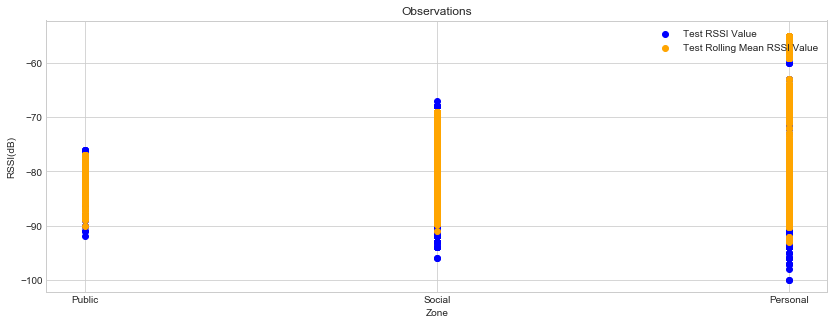

In [40]:
plt.figure(figsize=(14,5))
plt.scatter(test_dataset['zone'],test_dataset['rssi_Value'],label='Test RSSI Value',color='blue')
plt.scatter(test_dataset['zone'],test_dataset['rolling_mean_rssi'],label='Test Rolling Mean RSSI Value',color='orange')
plt.title('Observations')  
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

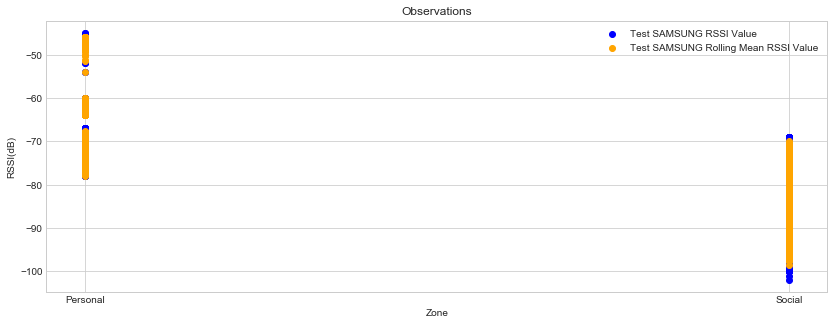

In [41]:
plt.figure(figsize=(14,5))
plt.scatter(test_dataset_home_big['zone'],test_dataset_home_big['rssi_Value'],label='Test SAMSUNG RSSI Value',color='blue')
plt.scatter(test_dataset_home_big['zone'],test_dataset_home_big['rolling_mean_rssi'],label='Test SAMSUNG Rolling Mean RSSI Value',color='orange')
plt.title('Observations')  
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

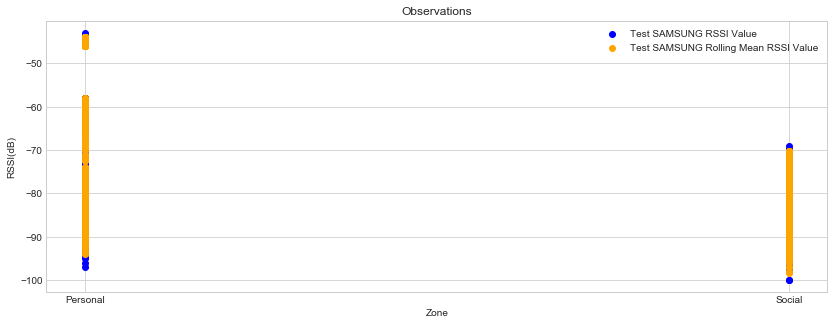

In [42]:
plt.figure(figsize=(14,5))
plt.scatter(test_dataset_home_small['zone'],test_dataset_home_small['rssi_Value'],label='Test SAMSUNG RSSI Value',color='blue')
plt.scatter(test_dataset_home_small['zone'],test_dataset_home_small['rolling_mean_rssi'],label='Test SAMSUNG Rolling Mean RSSI Value',color='orange')
plt.title('Observations')  
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

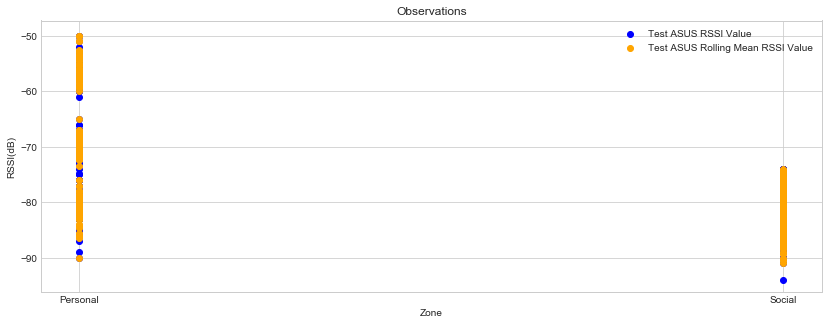

In [43]:
plt.figure(figsize=(14,5))
plt.scatter(test_dataset_home_asus['zone'],test_dataset_home_asus['rssi_Value'],label='Test ASUS RSSI Value',color='blue')
plt.scatter(test_dataset_home_asus['zone'],test_dataset_home_asus['rolling_mean_rssi'],label='Test ASUS Rolling Mean RSSI Value',color='orange')
plt.title('Observations')  
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

### Initialize Hyperparameters for tunning

In [44]:
scaler = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(),None]
C_parameter_list = [0.25,0.5,1.0,10.0,100.0,1000.0] 
kernel_list = ("linear","poly","rbf","sigmoid")
gamma_list = [10,100,"scale","auto"]
class_weights_list = ["balanced",None]
decision_function_shape_list = ["ovo","ovr"]

### Statistics Output Format
Structure of the statistical output of each call to the machine learning algorithm

In [45]:
def structure_data(data,precision,accuracy,f1score):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    precision = precision
    accuracy = accuracy
    f1score = f1score
    statistical_results = [mae,mse,rsme,precision,accuracy,f1score]
    return statistical_results

### Feature Selection
Check strength of features using ensemble algorithm Random Forest

Feature Selection Computation


array([0.36414881, 0.63585119])

rolling_mean_rssi    0.635851
rssi_Value           0.364149
dtype: float64

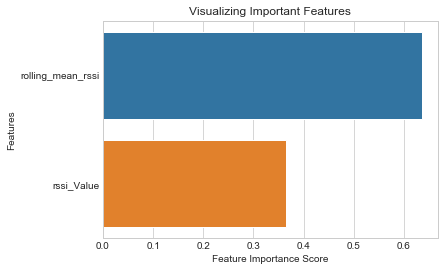

In [46]:
print("Feature Selection Computation")
random_forest_estimator = RandomForestClassifier()
main_estimator = make_pipeline(StandardScaler(),random_forest_estimator)
main_estimator.fit(combination_features_X,train_Y.ravel())
display(random_forest_estimator.feature_importances_)
feature_imp = pd.Series(random_forest_estimator.feature_importances_,index=combination_features_X.columns).sort_values(ascending=False)
display(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Training and Evaluation - SVM Classification Model
Experiments with SVC algorithm

In [47]:
def compute_SVM_with_Classifier(flag=0,colors=None,trainX_data = None,fold=None, trainY_data = None,testX_data = None,testY_data = None, scaler = None,
                                cross_validation = None,C_parameter = 1.0, kernel_parameter='rbf', gamma_parameter="scale",
                                class_weigth_parameter=None, decision_function_shape_parameter='ovr'):
    svm_classifier_estimator = SVC(C=C_parameter,kernel=kernel_parameter,gamma=gamma_parameter,class_weight=class_weigth_parameter,
                                  decision_function_shape=decision_function_shape_parameter,random_state = 42)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,svm_classifier_estimator)
    else:
        main_estimator = svm_classifier_estimator
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data)
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    else:
        predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation)
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    statistical_array = list()
    statistics = pd.DataFrame(report).transpose()
    error_dataframe = pd.DataFrame({'Actual': testY_data.flatten(), 'Predicted':predict_test.flatten()})
    if flag == 1:
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
    error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
    result = pd.DataFrame(train_Y,columns=["zone"]).join(error)
    return structure_data(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean())

#### Check Training model with no cross validation 
Use SVM Classifier to check the results on the training data alone

Confusion Matrix:
[[ 4105    33  3568]
 [    0  1138  3752]
 [   34   599 11605]]


,precision,recall,f1-score,support
0,0.991785,0.532702,0.693119,7706.000000
1,0.642938,0.232720,0.341742,4890.000000
2,0.613210,0.948276,0.744794,12238.000000
accuracy,0.678425,0.678425,0.678425,0.678425
macro avg,0.749311,0.571232,0.593218,24834.000000
weighted avg,0.736536,0.678425,0.649395,24834.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
24829,1,1
24830,1,1
24831,1,1
24832,1,1


Confusion Matrix:
[[ 3961     3  3742]
 [    0  1100  3790]
 [  338   677 11223]]


,precision,recall,f1-score,support
0,0.921377,0.514015,0.659892,7706.000000
1,0.617978,0.224949,0.329835,4890.000000
2,0.598400,0.917062,0.724228,12238.000000
accuracy,0.655714,0.655714,0.655714,0.655714
macro avg,0.712585,0.552009,0.571318,24834.000000
weighted avg,0.702475,0.655714,0.626606,24834.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
24829,1,1
24830,1,1
24831,1,1
24832,1,1


Confusion Matrix:
[[ 4550    35  3121]
 [    0  1788  3102]
 [  503   965 10770]]


,precision,recall,f1-score,support
0,0.900455,0.590449,0.713222,7706.000000
1,0.641320,0.365644,0.465746,4890.000000
2,0.633790,0.880046,0.736889,12238.000000
accuracy,0.688894,0.688894,0.688894,0.688894
macro avg,0.725189,0.612046,0.638619,24834.000000
weighted avg,0.718019,0.688894,0.676155,24834.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
24829,1,1
24830,1,1
24831,1,1
24832,1,1


,mae,mse,rmse,precision,accuracy,f1-score,type
2,0.311106,0.311106,0.557769,0.717945,0.688894,0.653254,Both
0,0.321575,0.321575,0.567076,0.735367,0.678425,0.616782,RSSI Only
1,0.344286,0.344286,0.586759,0.701422,0.655714,0.594599,Rolling Mean RSSI


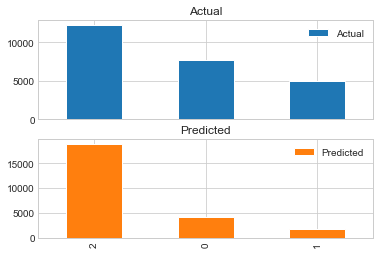

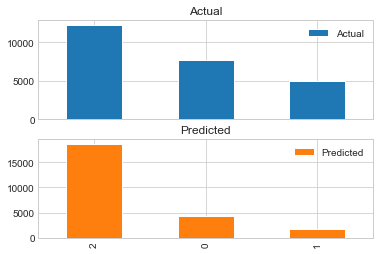

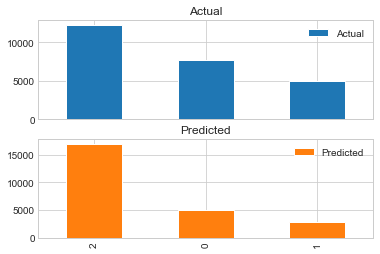

In [48]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    result = compute_SVM_with_Classifier(flag=1,trainX_data=trainX_data,trainY_data=train_Y.ravel(),
                                   testX_data=trainX_data,testY_data=train_Y.ravel(),
                                   scaler=StandardScaler())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

#### Experiment - SVM with StratifiedKFold 
Experiment using cross validation approach of StratifiedKFold

,mae,mse,rmse,precision,accuracy,f1-score,folds,type
2,0.378433,0.378433,0.615169,0.642990,0.621567,0.568589,4,RSSI Only
9,0.421640,0.421640,0.649338,0.585006,0.578360,0.543740,3,Both
11,0.441210,0.441210,0.664236,0.562488,0.558790,0.537781,5,Both
10,0.440726,0.440726,0.663872,0.558808,0.559274,0.536834,4,Both
3,0.451035,0.451035,0.671591,0.557353,0.548965,0.519039,5,RSSI Only
1,0.445961,0.445961,0.667803,0.558515,0.554039,0.518427,3,RSSI Only
6,0.428163,0.428163,0.654342,0.556672,0.571837,0.516287,4,Rolling Mean RSSI
7,0.465491,0.465491,0.682269,0.526362,0.534509,0.490984,5,Rolling Mean RSSI
0,0.532778,0.532778,0.729916,0.459234,0.467222,0.457280,2,RSSI Only
8,0.574938,0.574938,0.758246,0.418946,0.425062,0.420969,2,Both


Number of Folds:  4


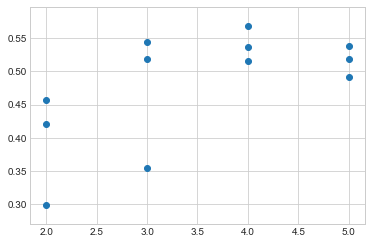

In [49]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','folds','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
cross_validation_list = np.arange(2,6)
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    for cv in cross_validation_list:
        result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = cv)  
        result.append(cv)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['folds'],statistics['f1-score'])
selected_fold = statistics.sort_values(by=['f1-score'],ascending=False)['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

#### Experiment - SVM with HoldOut
Experiment using cross validation approach of HoldOut (Train test split)

,mae,mse,rmse,precision,accuracy,f1-score,test_size,type
18,0.303945,0.303945,0.551312,0.727398,0.696055,0.663871,0.1,Both
20,0.313515,0.313515,0.559924,0.719443,0.686485,0.649324,0.3,Both
19,0.315482,0.315482,0.561678,0.719211,0.684518,0.647350,0.2,Both
22,0.317307,0.317307,0.563300,0.715205,0.682693,0.646853,0.5,Both
21,0.316891,0.316891,0.562931,0.716223,0.683109,0.646848,0.4,Both
23,0.317294,0.317294,0.563289,0.715345,0.682706,0.646387,0.6,Both
24,0.317994,0.317994,0.563909,0.717399,0.682006,0.641520,0.7,Both
25,0.319660,0.319660,0.565385,0.713857,0.680340,0.639089,0.8,Both
7,0.317596,0.317596,0.563557,0.734009,0.682404,0.635100,0.8,RSSI Only
5,0.320180,0.320180,0.565844,0.731995,0.679820,0.632150,0.6,RSSI Only


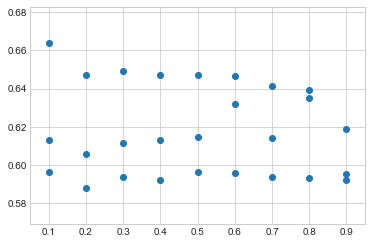

In [50]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','test_size','type']
test_sizes =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = list()
types = ['RSSI Only','Rolling Mean RSSI','Both']
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    for size in test_sizes:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = size, random_state = 42,stratify=train_Y)
        result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
        result.append(size)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['test_size'],statistics['f1-score'])

#### Experiment - SVM with Leave One Group Out
Experiment using cross validation approach of Leave One Group Out

In [51]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
results = list()
types = ['RSSI Only','Rolling Mean RSSI','Both']
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
    result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited)  
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

,mae,mse,rmse,precision,accuracy,f1-score,type
0,1.0,1.0,1.0,0.0,0.0,0.0,RSSI Only
1,1.0,1.0,1.0,0.0,0.0,0.0,Rolling Mean RSSI
2,1.0,1.0,1.0,0.0,0.0,0.0,Both


#### Evaluation Model Cross-Validation Experiment - Best cross-validation technique
Best parameters found using SVM

,mae,mse,rmse,precision,accuracy,f1-score,method,type
7,0.313515,0.313515,0.559924,0.719443,0.686485,0.649324,HoldOut,Both
1,0.324252,0.324252,0.569431,0.738561,0.675748,0.611376,HoldOut,RSSI Only
4,0.343981,0.343981,0.586499,0.704694,0.656019,0.593757,HoldOut,Rolling Mean RSSI
2,0.378433,0.378433,0.615169,0.642990,0.621567,0.568589,Stratified K-Fold,RSSI Only
8,0.440726,0.440726,0.663872,0.558808,0.559274,0.536834,Stratified K-Fold,Both
5,0.428163,0.428163,0.654342,0.556672,0.571837,0.516287,Stratified K-Fold,Rolling Mean RSSI
0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,LOO,RSSI Only
3,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,LOO,Rolling Mean RSSI
6,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,LOO,Both


Selected cross validation method:  HoldOut


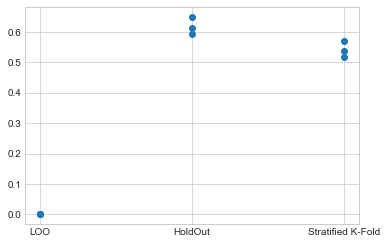

In [52]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','method','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
    holdout = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
    loo = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited)  
    loo.append('LOO')
    loo.append(feature)
    results.append(loo)
    holdout.append('HoldOut')
    holdout.append(feature)
    results.append(holdout)
    skfold = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = selected_fold)
    skfold.append('Stratified K-Fold')
    skfold.append(feature)
    results.append(skfold)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['method'],statistics['f1-score'],'o')
selected_method = statistics.sort_values(by=['f1-score'],ascending=False)['method'].head(1).values[0]
print("Selected cross validation method: ",selected_method)

#### Experiment - Best preprocessing technique
Experiment with the different preprocessing techniques

,mae,mse,rmse,precision,accuracy,f1-score,preprocessing,preprocessingFunc,type
11,0.312575,0.312575,0.559085,0.720189,0.687425,0.650935,None,None,Both
10,0.312844,0.312844,0.559325,0.720794,0.687156,0.649887,MaxAbsScaler,MaxAbsScaler(copy=True),Both
8,0.313515,0.313515,0.559924,0.719443,0.686485,0.649324,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",Both
9,0.315394,0.315394,0.561599,0.719412,0.684606,0.647270,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",Both
0,0.324252,0.324252,0.569431,0.738561,0.675748,0.611376,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",RSSI Only
1,0.324252,0.324252,0.569431,0.738561,0.675748,0.611376,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",RSSI Only
2,0.324252,0.324252,0.569431,0.738561,0.675748,0.611376,MaxAbsScaler,MaxAbsScaler(copy=True),RSSI Only
3,0.324252,0.324252,0.569431,0.738561,0.675748,0.611376,None,None,RSSI Only
4,0.343981,0.343981,0.586499,0.704694,0.656019,0.593757,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",Rolling Mean RSSI
5,0.343981,0.343981,0.586499,0.704694,0.656019,0.593757,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",Rolling Mean RSSI


Selected Preprocessing:  None


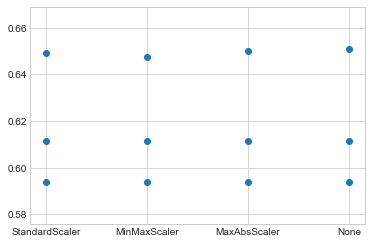

In [53]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','preprocessing','preprocessingFunc','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    for preprocess in scaler:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=preprocess,cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=preprocess,cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=preprocess)
        if(preprocess is None):
            regex = 'None'
        else:
            regex = re.search('(\w+)\(',str(preprocess)).group(1)
        result.append(regex)
        result.append(preprocess)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['preprocessing'],statistics['f1-score'])
selected_preprocessing = statistics.sort_values(by=['f1-score'],ascending=False)['preprocessing'].head(1).values[0]
selected_preprocesssing_func = statistics.sort_values(by=['f1-score'],ascending=False)['preprocessingFunc'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

#### Experiment - Running the SVC function with the different kernels

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,mae,mse,rmse,precision,accuracy,f1-score,kernel,type
10,0.313515,0.313515,0.559924,0.719443,0.686485,0.649324,rbf,Both
2,0.324252,0.324252,0.569431,0.738561,0.675748,0.611376,rbf,RSSI Only
6,0.343981,0.343981,0.586499,0.704694,0.656019,0.593757,rbf,Rolling Mean RSSI
9,0.349618,0.349618,0.591285,0.723746,0.650382,0.587461,poly,Both
5,0.350289,0.350289,0.591852,0.722542,0.649711,0.576802,poly,Rolling Mean RSSI
1,0.363173,0.363173,0.602638,0.724091,0.636827,0.565635,poly,RSSI Only
8,0.378607,0.378607,0.615310,0.484977,0.621393,0.500752,linear,Both
3,0.476178,0.476178,0.690056,0.494790,0.523822,0.499190,sigmoid,RSSI Only
7,0.487586,0.487586,0.698273,0.491866,0.512414,0.496865,sigmoid,Rolling Mean RSSI
4,0.383304,0.383304,0.619116,0.480562,0.616696,0.496595,linear,Rolling Mean RSSI


Selected Kernel:  rbf


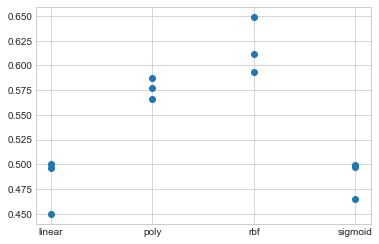

In [54]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','kernel','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    for kernel in kernel_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),kernel_parameter=kernel,
                                                 cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),kernel_parameter=kernel,
                                                 cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler = StandardScaler(),kernel_parameter=kernel)
        result.append(kernel)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['kernel'],statistics['f1-score'],'o')
selected_kernel = statistics.sort_values(by=['f1-score'],ascending=False)['kernel'].head(1).values[0]
print("Selected Kernel: ",selected_kernel)

#### Experiment - Running the SVC function with the different C parameters

,mae,mse,rmse,precision,accuracy,f1-score,C_parameter,type
17,0.276876,0.276876,0.526190,0.756426,0.723124,0.685386,1000.00,Both
16,0.284257,0.284257,0.533158,0.750634,0.715743,0.674565,100.00,Both
15,0.304657,0.304657,0.551958,0.726600,0.695343,0.657657,10.00,Both
14,0.313515,0.313515,0.559924,0.719443,0.686485,0.649324,1.00,Both
13,0.316199,0.316199,0.562316,0.720740,0.683801,0.643532,0.50,Both
12,0.316870,0.316870,0.562912,0.721150,0.683130,0.641061,0.25,Both
5,0.317541,0.317541,0.563508,0.739436,0.682459,0.633871,1000.00,RSSI Only
4,0.317810,0.317810,0.563746,0.739344,0.682190,0.633040,100.00,RSSI Only
1,0.324118,0.324118,0.569313,0.738791,0.675882,0.611639,0.50,RSSI Only
0,0.324118,0.324118,0.569313,0.738791,0.675882,0.611639,0.25,RSSI Only


Selected C Parameter:  1000.0


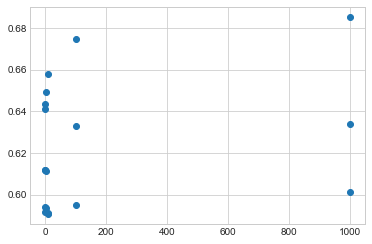

In [55]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','C_parameter','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    for C_param in C_parameter_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),C_parameter=C_param,
                                                 cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),C_parameter=C_param,
                                                 cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler = StandardScaler(),C_parameter=C_param)
        result.append(C_param)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['C_parameter'],statistics['f1-score'],'o')
selected_c_parameter = statistics.sort_values(by=['f1-score'],ascending=False)['C_parameter'].head(1).values[0]
print("Selected C Parameter: ",selected_c_parameter)

#### Experiment - Running the SVC function with the different gamma parameters

In [56]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','gamma','gammaStr','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    for gamma_param in gamma_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),gamma_parameter=gamma_param,
                                                 cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),gamma_parameter=gamma_param,
                                                 cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler = StandardScaler(),gamma_parameter=gamma_param)
        result.append(gamma_param)
        result.append(str(gamma_param))
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
selected_gamma = statistics.sort_values(by=['f1-score'],ascending=False)['gamma'].head(1).values[0]
print("Selected Gamma: ",selected_gamma)

,mae,mse,rmse,precision,accuracy,f1-score,gamma,gammaStr,type
9,0.210173,0.210173,0.458446,0.788648,0.789827,0.775833,100,100,Both
8,0.228828,0.228828,0.478360,0.772796,0.771172,0.754044,10,10,Both
1,0.277949,0.277949,0.527209,0.719517,0.722051,0.701806,100,100,RSSI Only
10,0.313515,0.313515,0.559924,0.719443,0.686485,0.649324,scale,scale,Both
11,0.313515,0.313515,0.559924,0.719443,0.686485,0.649324,auto,auto,Both
5,0.327473,0.327473,0.572252,0.683651,0.672527,0.634699,100,100,Rolling Mean RSSI
0,0.317675,0.317675,0.563627,0.739250,0.682325,0.633638,10,10,RSSI Only
4,0.333378,0.333378,0.577389,0.725982,0.666622,0.618415,10,10,Rolling Mean RSSI
2,0.324252,0.324252,0.569431,0.738561,0.675748,0.611376,scale,scale,RSSI Only
3,0.324252,0.324252,0.569431,0.738561,0.675748,0.611376,auto,auto,RSSI Only


Selected Gamma:  100


#### Experiment - Running the SVC function with the different weights metrics

,mae,mse,rmse,precision,accuracy,f1-score,class_weights,type
5,0.313515,0.313515,0.559924,0.719443,0.686485,0.649324,None,Both
4,0.388673,0.388673,0.623436,0.621079,0.611327,0.615941,balanced,Both
1,0.324252,0.324252,0.569431,0.738561,0.675748,0.611376,None,RSSI Only
0,0.387196,0.387196,0.622251,0.630785,0.612804,0.606949,balanced,RSSI Only
3,0.343981,0.343981,0.586499,0.704694,0.656019,0.593757,None,Rolling Mean RSSI
2,0.452691,0.452691,0.672823,0.571730,0.547309,0.553000,balanced,Rolling Mean RSSI


Selected Class Weight:  None


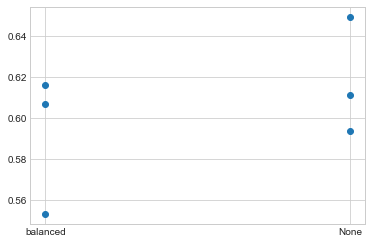

In [57]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','class_weights','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    for weight in class_weights_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),class_weigth_parameter=weight,
                                                 cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),class_weigth_parameter=weight,
                                                 cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler = StandardScaler(),class_weigth_parameter=weight)
        result.append(str(weight))
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['class_weights'],statistics['f1-score'],'o')
selected_weight = statistics.sort_values(by=['f1-score'],ascending=False)['class_weights'].head(1).values[0]
print("Selected Class Weight: ",selected_weight)

#### Experiment: Running the SVC function with the different decision function metrics

,mae,mse,rmse,precision,accuracy,f1-score,decision_function,type
4,0.313515,0.313515,0.559924,0.719443,0.686485,0.649324,ovo,Both
5,0.313515,0.313515,0.559924,0.719443,0.686485,0.649324,ovr,Both
0,0.324252,0.324252,0.569431,0.738561,0.675748,0.611376,ovo,RSSI Only
1,0.324252,0.324252,0.569431,0.738561,0.675748,0.611376,ovr,RSSI Only
2,0.343981,0.343981,0.586499,0.704694,0.656019,0.593757,ovo,Rolling Mean RSSI
3,0.343981,0.343981,0.586499,0.704694,0.656019,0.593757,ovr,Rolling Mean RSSI


Selected Decision:  ovo


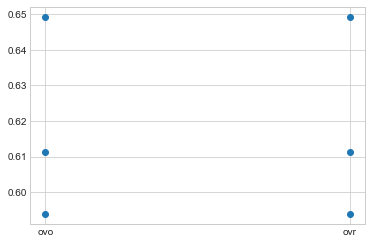

In [58]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','decision_function','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    for decision in decision_function_shape_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),decision_function_shape_parameter=decision,
                                                 cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),decision_function_shape_parameter=decision,
                                                 cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler = StandardScaler(),decision_function_shape_parameter=decision)
        result.append(str(decision))
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['decision_function'],statistics['f1-score'],'o')
selected_decision = statistics.sort_values(by=['f1-score'],ascending=False)['decision_function'].head(1).values[0]
print("Selected Decision: ",selected_decision)

### Run RandomizedSearchCV for parameter tunning

In [60]:
results = list()
tuned_parameters = {
    'svc__kernel':['rbf'],
    'svc__C':C_parameter_list,
    'svc__gamma':gamma_list
}
scores = ['f1_macro']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    for feature in types:
        #Decide on type of data
        if feature == 'RSSI Only':
            trainX_data = train_X_rssi
        elif feature == 'Rolling Mean RSSI':
            trainX_data = train_X_rolling_mean
        else:
            trainX_data = combination_features_X 
        pipe = Pipeline([('standardizer', StandardScaler()), ('svc', SVC())])
        clf = RandomizedSearchCV(
           pipe, param_distributions = tuned_parameters, n_iter = 45, cv=selected_fold,scoring=score,verbose=1,n_jobs=-1
        )
        clf.fit(trainX_data,train_Y.ravel())
        clf.best_params_['score'] = score
        clf.best_params_['best_score'] = clf.best_score_
        clf.best_params_['type'] = feature
        results.append(clf.best_params_)
gridcv_results = pd.DataFrame(results).sort_values(by=['best_score'],ascending=False)
display(gridcv_results)

# Tuning hyper-parameters for f1_macro

Fitting 4 folds for each of 24 candidates, totalling 96 fits


D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=45. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 25.9min finished
D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=45. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 85.0min finished
D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=45. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 39.5min finished


,svc__kernel,svc__gamma,svc__C,score,best_score,type
2,rbf,100,1.0,f1_macro,0.640524,Both
0,rbf,100,0.5,f1_macro,0.550951,RSSI Only
1,rbf,100,10.0,f1_macro,0.485285,Rolling Mean RSSI


### Best Parameters
Display the best parameters tunned throughout the experiments

In [61]:
conclusion_cols=['C Parameter','Cross Validation','Kernel','Preprocessing','Gamma','Class Weights','Decision Function']
conclusion_list = [selected_c_parameter,selected_method,selected_kernel,selected_preprocessing,selected_gamma,selected_weight,
                  selected_decision]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)

,C Parameter,Cross Validation,Kernel,Preprocessing,Gamma,Class Weights,Decision Function
0,1000.0,HoldOut,rbf,None,100,None,ovo


### Best Results
Compute SVC with the best parameters in both RSSI and Rolling Mean

In [64]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
final_results = list()
for feature in types:
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(X_train,train_Y.ravel(),groups=train_Y.ravel())
        result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                             cross_validation = splited,
                            kernel_parameter=selected_kernel,C_parameter=selected_c_parameter,
                             gamma_parameter=selected_gamma,decision_function_shape_parameter=selected_decision)  
    elif selected_method =='Stratified K-Fold':
        result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                             cross_validation = selected_fold,
                            kernel_parameter=selected_kernel,C_parameter=selected_c_parameter,
                             gamma_parameter=selected_gamma,decision_function_shape_parameter=selected_decision,)
    else:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3,
                                                                                    random_state = 42,stratify=train_Y)
        result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                             scaler=StandardScaler(),kernel_parameter=selected_kernel,C_parameter=selected_c_parameter,
                             gamma_parameter=selected_gamma,decision_function_shape_parameter=selected_decision)
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
final_results.append(statistics.sort_values(by=['f1-score'],ascending=False).head(1).values[0])

,mae,mse,rmse,precision,accuracy,f1-score,type
2,0.213797,0.213797,0.462382,0.785848,0.786203,0.769329,Both
0,0.277815,0.277815,0.527082,0.719672,0.722185,0.701990,RSSI Only
1,0.326936,0.326936,0.571783,0.679383,0.673064,0.635626,Rolling Mean RSSI


### Best Results - Testing data (Different Beacon)
Experiment with testing dataset

Confusion Matrix:
[[861  70 180]
 [105 155 451]
 [610 262 983]]


,precision,recall,f1-score,support
0,0.546320,0.774977,0.640863,1111.00000
1,0.318275,0.218003,0.258765,711.00000
2,0.609046,0.529919,0.566734,1855.00000
accuracy,0.543650,0.543650,0.543650,0.54365
macro avg,0.491214,0.507633,0.488787,3677.00000
weighted avg,0.533869,0.543650,0.529582,3677.00000


,Actual,Predicted
0,1,2
1,1,1
2,1,2
3,1,1
4,1,1
...,...,...
3672,0,0
3673,0,0
3674,0,0
3675,0,0


Confusion Matrix:
[[1111    0    0]
 [ 711    0    0]
 [1855    0    0]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.302148,1.000000,0.464077,1111.000000
1,0.000000,0.000000,0.000000,711.000000
2,0.000000,0.000000,0.000000,1855.000000
accuracy,0.302148,0.302148,0.302148,0.302148
macro avg,0.100716,0.333333,0.154692,3677.000000
weighted avg,0.091294,0.302148,0.140220,3677.000000


,Actual,Predicted
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
3672,0,0
3673,0,0
3674,0,0
3675,0,0


Confusion Matrix:
[[ 949   60  102]
 [   0   17  694]
 [ 359  123 1373]]


,precision,recall,f1-score,support
0,0.725535,0.854185,0.784622,1111.000000
1,0.085000,0.023910,0.037322,711.000000
2,0.633011,0.740162,0.682406,1855.000000
accuracy,0.636116,0.636116,0.636116,0.636116
macro avg,0.481182,0.539419,0.501450,3677.000000
weighted avg,0.555001,0.636116,0.588554,3677.000000


,Actual,Predicted
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
3672,0,0
3673,0,0
3674,0,0
3675,0,0


Confusion Matrix:
[[1111    0    0]
 [ 711    0    0]
 [1855    0    0]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.302148,1.000000,0.464077,1111.000000
1,0.000000,0.000000,0.000000,711.000000
2,0.000000,0.000000,0.000000,1855.000000
accuracy,0.302148,0.302148,0.302148,0.302148
macro avg,0.100716,0.333333,0.154692,3677.000000
weighted avg,0.091294,0.302148,0.140220,3677.000000


,Actual,Predicted
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
3672,0,0
3673,0,0
3674,0,0
3675,0,0


Confusion Matrix:
[[ 598   57  456]
 [  93   97  521]
 [ 576  226 1053]]


,precision,recall,f1-score,support
0,0.471981,0.538254,0.502944,1111.000000
1,0.255263,0.136428,0.177819,711.000000
2,0.518719,0.567655,0.542085,1855.000000
accuracy,0.475388,0.475388,0.475388,0.475388
macro avg,0.415321,0.414112,0.407616,3677.000000
weighted avg,0.453654,0.475388,0.459822,3677.000000


,Actual,Predicted
0,1,2
1,1,1
2,1,2
3,1,1
4,1,1
...,...,...
3672,0,2
3673,0,2
3674,0,2
3675,0,2


Confusion Matrix:
[[1111    0    0]
 [ 711    0    0]
 [1855    0    0]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.302148,1.000000,0.464077,1111.000000
1,0.000000,0.000000,0.000000,711.000000
2,0.000000,0.000000,0.000000,1855.000000
accuracy,0.302148,0.302148,0.302148,0.302148
macro avg,0.100716,0.333333,0.154692,3677.000000
weighted avg,0.091294,0.302148,0.140220,3677.000000


,Actual,Predicted
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
3672,0,0
3673,0,0
3674,0,0
3675,0,0


,mae,mse,rmse,precision,accuracy,f1-score,type,Tuning
2,0.363884,0.363884,0.603228,0.519308,0.636116,0.538411,Rolling Mean RSSI,True
0,0.456350,0.456350,0.675537,0.507062,0.543650,0.504730,RSSI Only,True
4,0.524612,0.524612,0.724301,0.431721,0.475388,0.427612,Both,True
1,0.697852,0.697852,0.835375,0.132718,0.302148,0.176856,RSSI Only,False
3,0.697852,0.697852,0.835375,0.132718,0.302148,0.176856,Rolling Mean RSSI,False
5,0.697852,0.697852,0.835375,0.132718,0.302148,0.176856,Both,False


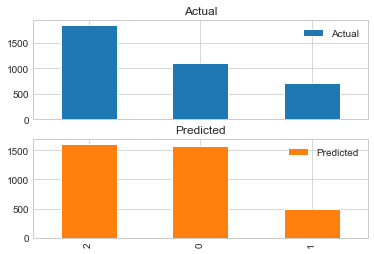

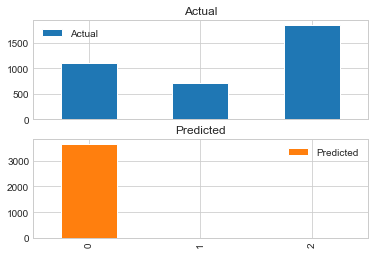

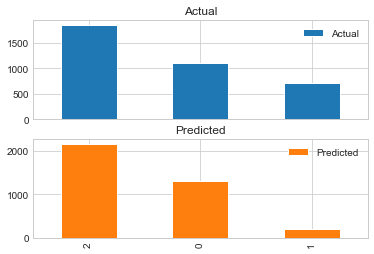

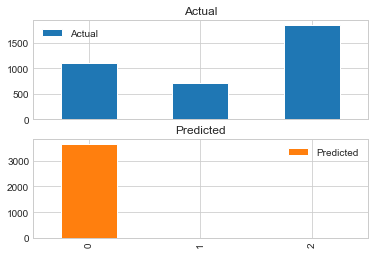

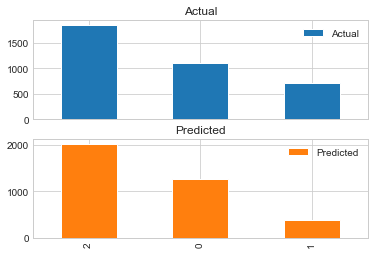

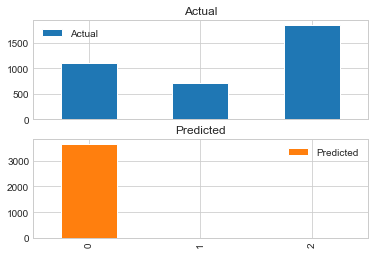

In [65]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type','Tuning']
results = list()
tuning =[True,False]
types = ['RSSI Only','Rolling Mean RSSI','Both']
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
        testX_data = test_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
        testX_data = test_X_rolling_mean
    else:
        trainX_data = combination_features_X
        testX_data = test_combination_features_X 
    scaler = StandardScaler()
    scaler.fit(trainX_data)
    testX_data = scaler.transform(testX_data)
    for tune in tuning:
        if tune == True:
            model = SVC(C=selected_c_parameter,kernel=selected_kernel,gamma=selected_gamma,
                                  decision_function_shape=selected_decision,random_state = 42)
        else: 
            model = SVC()
        trainX_data = scaler.transform(trainX_data)
        model.fit(trainX_data,train_Y.ravel())
        predicted = model.predict(testX_data)
        matrix = confusion_matrix(test_Y.ravel(), predicted)
        report = classification_report(test_Y.ravel(), predicted,output_dict=True)
        accuracy = accuracy_score(test_Y.ravel(),predicted)
        statistical_array = list()
        statistics = pd.DataFrame(report).transpose()
        error_dataframe = pd.DataFrame({'Actual': test_Y.flatten(), 'Predicted':predicted.flatten()})
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
        error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
        result = pd.DataFrame(train_Y,columns=["zone"]).join(error)
        data = structure_data(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean())
        data.append(feature)
        data.append(tune)
        results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
final_results.append(statistics.sort_values(by=['f1-score'],ascending=False).head(1).values[0])

### Best Results - Home Testing data (using data recovered from Android 10 SAMSUNG Galaxy A71 BIG Dataset)
Experiment with testing dataset

Confusion Matrix:
[[2673  105 2017]
 [   0    0    0]
 [1536 1256 4888]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.635068,0.557456,0.593736,4795.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.707893,0.636458,0.670278,7680.000000
accuracy,0.606092,0.606092,0.606092,0.606092
macro avg,0.447654,0.397971,0.421338,12475.000000
weighted avg,0.679901,0.606092,0.640857,12475.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
12470,2,2
12471,2,2
12472,2,2
12473,2,2


Confusion Matrix:
[[4795    0]
 [7680    0]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.384369,1.000000,0.555298,4795.000000
2,0.000000,0.000000,0.000000,7680.000000
accuracy,0.384369,0.384369,0.384369,0.384369
macro avg,0.192184,0.500000,0.277649,12475.000000
weighted avg,0.147739,0.384369,0.213439,12475.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
12470,2,0
12471,2,0
12472,2,0
12473,2,0


Confusion Matrix:
[[4152   30  613]
 [   0    0    0]
 [ 902 1206 5572]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.821528,0.865902,0.843131,4795.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.900889,0.725521,0.803750,7680.000000
accuracy,0.779479,0.779479,0.779479,0.779479
macro avg,0.574139,0.530474,0.548961,12475.000000
weighted avg,0.870385,0.779479,0.818887,12475.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
12470,2,2
12471,2,2
12472,2,2
12473,2,2


Confusion Matrix:
[[4795    0]
 [7680    0]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.384369,1.000000,0.555298,4795.000000
2,0.000000,0.000000,0.000000,7680.000000
accuracy,0.384369,0.384369,0.384369,0.384369
macro avg,0.192184,0.500000,0.277649,12475.000000
weighted avg,0.147739,0.384369,0.213439,12475.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
12470,2,0
12471,2,0
12472,2,0
12473,2,0


Confusion Matrix:
[[2621   33 2141]
 [   0    0    0]
 [1751 1287 4642]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.599497,0.546611,0.571834,4795.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.684358,0.604427,0.641914,7680.000000
accuracy,0.582204,0.582204,0.582204,0.582204
macro avg,0.427952,0.383679,0.404583,12475.000000
weighted avg,0.651740,0.582204,0.614977,12475.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
12470,2,2
12471,2,2
12472,2,2
12473,2,2


Confusion Matrix:
[[4795    0]
 [7680    0]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.384369,1.000000,0.555298,4795.000000
2,0.000000,0.000000,0.000000,7680.000000
accuracy,0.384369,0.384369,0.384369,0.384369
macro avg,0.192184,0.500000,0.277649,12475.000000
weighted avg,0.147739,0.384369,0.213439,12475.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
12470,2,0
12471,2,0
12472,2,0
12473,2,0


,mae,mse,rmse,precision,accuracy,f1-score,type,Tuning
2,0.220521,0.220521,0.469597,0.657737,0.779479,0.632368,Rolling Mean RSSI,True
0,0.393908,0.393908,0.627621,0.512768,0.606092,0.488717,RSSI Only,True
4,0.417796,0.417796,0.646371,0.490958,0.582204,0.469252,Both,True
1,0.615631,0.615631,0.784622,0.221732,0.384369,0.286151,RSSI Only,False
3,0.615631,0.615631,0.784622,0.221732,0.384369,0.286151,Rolling Mean RSSI,False
5,0.615631,0.615631,0.784622,0.221732,0.384369,0.286151,Both,False


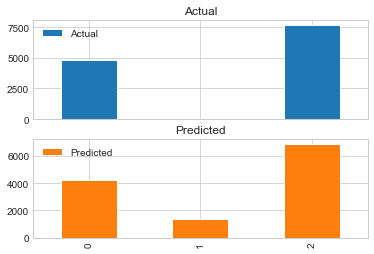

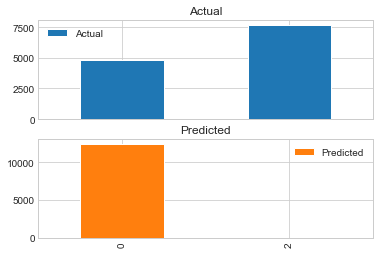

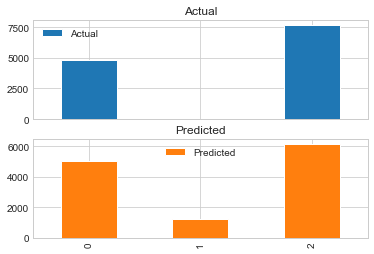

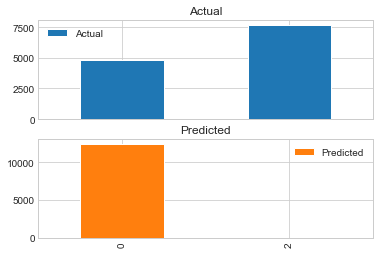

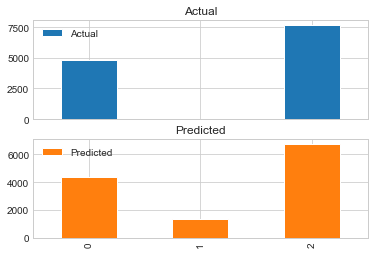

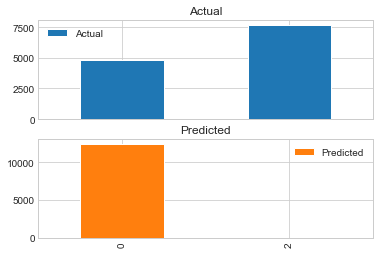

In [66]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type','Tuning']
results = list()
tuning =[True,False]
types = ['RSSI Only','Rolling Mean RSSI','Both']
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
        testX_data = test_X_rssi_home_big
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
        testX_data = test_X_rolling_mean_home_big
    else:
        trainX_data = combination_features_X
        testX_data = test_combination_features_X_home_big
    scaler = StandardScaler()
    scaler.fit(trainX_data)
    testX_data = scaler.transform(testX_data)
    for tune in tuning:
        if tune == True:
            model = SVC(C=selected_c_parameter,kernel=selected_kernel,gamma=selected_gamma,
                                  decision_function_shape=selected_decision,random_state = 42)
        else: 
            model = SVC()
        trainX_data = scaler.transform(trainX_data)
        model.fit(trainX_data,train_Y.ravel())
        predicted = model.predict(testX_data)
        matrix = confusion_matrix(test_Y_home_big.ravel(), predicted)
        report = classification_report(test_Y_home_big.ravel(), predicted,output_dict=True)
        accuracy = accuracy_score(test_Y_home_big.ravel(),predicted)
        statistical_array = list()
        statistics = pd.DataFrame(report).transpose()
        error_dataframe = pd.DataFrame({'Actual': test_Y_home_big.flatten(), 'Predicted':predicted.flatten()})
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
        error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
        result = pd.DataFrame(train_Y,columns=["zone"]).join(error)
        data = structure_data(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean())
        data.append(feature)
        data.append(tune)
        results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
final_results.append(statistics.sort_values(by=['f1-score'],ascending=False).head(1).values[0])

### Best Results - Home Testing data (using data recovered from Android 10 SAMSUNG Galaxy A71 Small Dataset)
Experiment with testing dataset

Confusion Matrix:
[[297  83 477]
 [  0   0   0]
 [219 312 896]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.575581,0.346558,0.432629,857.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.652586,0.627891,0.640000,1427.000000
accuracy,0.522329,0.522329,0.522329,0.522329
macro avg,0.409389,0.324816,0.357543,2284.000000
weighted avg,0.623692,0.522329,0.562191,2284.000000


,Actual,Predicted
0,0,2
1,0,2
2,0,2
3,0,2
4,0,0
...,...,...
2279,2,1
2280,2,2
2281,2,2
2282,2,1


Confusion Matrix:
[[ 857    0]
 [1427    0]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.375219,1.000000,0.545686,857.000000
2,0.000000,0.000000,0.000000,1427.000000
accuracy,0.375219,0.375219,0.375219,0.375219
macro avg,0.187609,0.500000,0.272843,2284.000000
weighted avg,0.140789,0.375219,0.204752,2284.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2279,2,0
2280,2,0
2281,2,0
2282,2,0


Confusion Matrix:
[[ 514   50  293]
 [   0    0    0]
 [ 144  204 1079]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.781155,0.599767,0.678548,857.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.786443,0.756132,0.770990,1427.000000
accuracy,0.697461,0.697461,0.697461,0.697461
macro avg,0.522533,0.451966,0.483179,2284.000000
weighted avg,0.784459,0.697461,0.736304,2284.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2279,2,2
2280,2,2
2281,2,2
2282,2,2


Confusion Matrix:
[[ 857    0]
 [1427    0]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.375219,1.000000,0.545686,857.000000
2,0.000000,0.000000,0.000000,1427.000000
accuracy,0.375219,0.375219,0.375219,0.375219
macro avg,0.187609,0.500000,0.272843,2284.000000
weighted avg,0.140789,0.375219,0.204752,2284.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2279,2,0
2280,2,0
2281,2,0
2282,2,0


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[188 105 564]
 [  0   0   0]
 [264 326 837]]


,precision,recall,f1-score,support
0,0.415929,0.219370,0.287242,857.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.597430,0.586545,0.591938,1427.000000
accuracy,0.448774,0.448774,0.448774,0.448774
macro avg,0.337787,0.268638,0.293060,2284.000000
weighted avg,0.529328,0.448774,0.477610,2284.000000


,Actual,Predicted
0,0,2
1,0,2
2,0,2
3,0,2
4,0,2
...,...,...
2279,2,1
2280,2,2
2281,2,2
2282,2,1


Confusion Matrix:
[[ 857    0]
 [1427    0]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.375219,1.000000,0.545686,857.000000
2,0.000000,0.000000,0.000000,1427.000000
accuracy,0.375219,0.375219,0.375219,0.375219
macro avg,0.187609,0.500000,0.272843,2284.000000
weighted avg,0.140789,0.375219,0.204752,2284.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2279,2,0
2280,2,0
2281,2,0
2282,2,0


,mae,mse,rmse,precision,accuracy,f1-score,type,Tuning
2,0.302539,0.302539,0.550036,0.595342,0.697461,0.561080,Rolling Mean RSSI,True
0,0.477671,0.477671,0.691137,0.463930,0.522329,0.419115,RSSI Only,True
4,0.551226,0.551226,0.742446,0.388208,0.448774,0.349771,Both,True
1,0.624781,0.624781,0.790431,0.215767,0.375219,0.279700,RSSI Only,False
3,0.624781,0.624781,0.790431,0.215767,0.375219,0.279700,Rolling Mean RSSI,False
5,0.624781,0.624781,0.790431,0.215767,0.375219,0.279700,Both,False


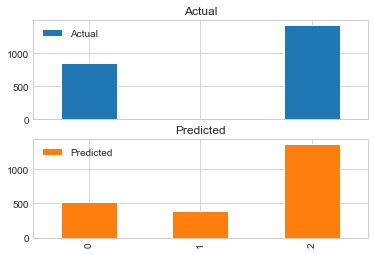

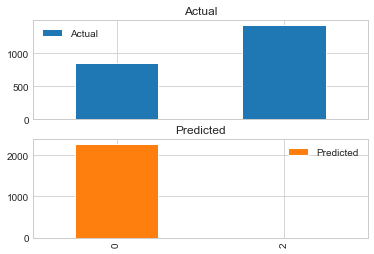

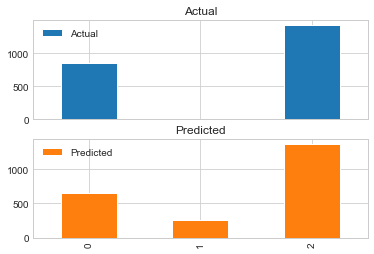

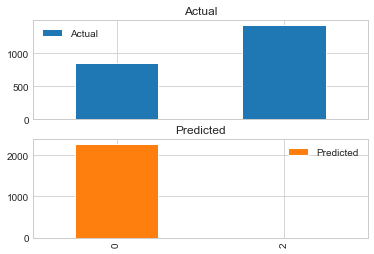

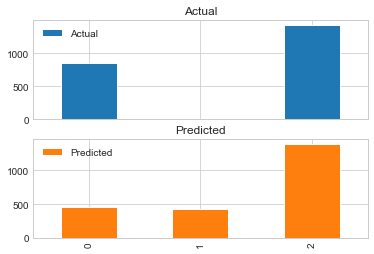

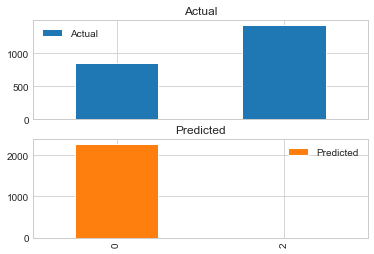

In [70]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type','Tuning']
results = list()
tuning =[True,False]
types = ['RSSI Only','Rolling Mean RSSI','Both']
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
        testX_data = test_X_rssi_home_small
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
        testX_data = test_X_rolling_mean_home_small
    else:
        trainX_data = combination_features_X
        testX_data = test_combination_features_X_home_small
    scaler = StandardScaler()
    scaler.fit(trainX_data)
    testX_data = scaler.transform(testX_data)
    for tune in tuning:
        if tune == True:
            model = SVC(C=selected_c_parameter,kernel=selected_kernel,gamma=selected_gamma,
                                  decision_function_shape=selected_decision,random_state = 42)
        else: 
            model = SVC()
        trainX_data = scaler.transform(trainX_data)
        model.fit(trainX_data,train_Y.ravel())
        predicted = model.predict(testX_data)
        matrix = confusion_matrix(test_Y_home_small.ravel(), predicted)
        report = classification_report(test_Y_home_small.ravel(), predicted,output_dict=True)
        accuracy = accuracy_score(test_Y_home_small.ravel(),predicted)
        statistical_array = list()
        statistics = pd.DataFrame(report).transpose()
        error_dataframe = pd.DataFrame({'Actual': test_Y_home_small.flatten(), 'Predicted':predicted.flatten()})
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
        error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
        result = pd.DataFrame(train_Y,columns=["zone"]).join(error)
        data = structure_data(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean())
        data.append(feature)
        data.append(tune)
        results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
final_results.append(statistics.sort_values(by=['f1-score'],ascending=False).head(1).values[0])

### Best Results - Home Testing data (using data recovered from ASUS ZENFONE LIVE)
Experiment with testing dataset

Confusion Matrix:
[[ 89   5  62]
 [  0   0   0]
 [ 35  61 163]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.717742,0.570513,0.635714,156.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.724444,0.629344,0.673554,259.000000
accuracy,0.607229,0.607229,0.607229,0.607229
macro avg,0.480729,0.399952,0.436423,415.000000
weighted avg,0.721925,0.607229,0.659330,415.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
410,2,2
411,2,2
412,2,1
413,2,2


Confusion Matrix:
[[156   0]
 [259   0]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.375904,1.000000,0.546410,156.000000
2,0.000000,0.000000,0.000000,259.000000
accuracy,0.375904,0.375904,0.375904,0.375904
macro avg,0.187952,0.500000,0.273205,415.000000
weighted avg,0.141304,0.375904,0.205397,415.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
410,2,0
411,2,0
412,2,0
413,2,0


Confusion Matrix:
[[ 95   3  58]
 [  0   0   0]
 [  9  21 229]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.913462,0.608974,0.730769,156.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.797909,0.884170,0.838828,259.000000
accuracy,0.780723,0.780723,0.780723,0.780723
macro avg,0.570457,0.497715,0.523199,415.000000
weighted avg,0.841346,0.780723,0.798208,415.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
410,2,2
411,2,2
412,2,2
413,2,2


Confusion Matrix:
[[156   0]
 [259   0]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.375904,1.000000,0.546410,156.000000
2,0.000000,0.000000,0.000000,259.000000
accuracy,0.375904,0.375904,0.375904,0.375904
macro avg,0.187952,0.500000,0.273205,415.000000
weighted avg,0.141304,0.375904,0.205397,415.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
410,2,0
411,2,0
412,2,0
413,2,0


Confusion Matrix:
[[ 60   8  88]
 [  0   0   0]
 [ 28  59 172]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.681818,0.384615,0.491803,156.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.661538,0.664093,0.662813,259.000000
accuracy,0.559036,0.559036,0.559036,0.559036
macro avg,0.447786,0.349569,0.384872,415.000000
weighted avg,0.669162,0.559036,0.598530,415.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,2
3,0,0
4,0,2
...,...,...
410,2,2
411,2,1
412,2,1
413,2,2


Confusion Matrix:
[[156   0]
 [259   0]]


D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.375904,1.000000,0.546410,156.000000
2,0.000000,0.000000,0.000000,259.000000
accuracy,0.375904,0.375904,0.375904,0.375904
macro avg,0.187952,0.500000,0.273205,415.000000
weighted avg,0.141304,0.375904,0.205397,415.000000


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
410,2,0
411,2,0
412,2,0
413,2,0


,mae,mse,rmse,precision,accuracy,f1-score,type,Tuning
2,0.219277,0.219277,0.468270,0.650649,0.780723,0.611955,Rolling Mean RSSI,True
0,0.392771,0.392771,0.626715,0.542012,0.607229,0.502042,RSSI Only,True
4,0.440964,0.440964,0.664051,0.503223,0.559036,0.449509,Both,True
1,0.624096,0.624096,0.789998,0.216213,0.375904,0.280183,RSSI Only,False
3,0.624096,0.624096,0.789998,0.216213,0.375904,0.280183,Rolling Mean RSSI,False
5,0.624096,0.624096,0.789998,0.216213,0.375904,0.280183,Both,False


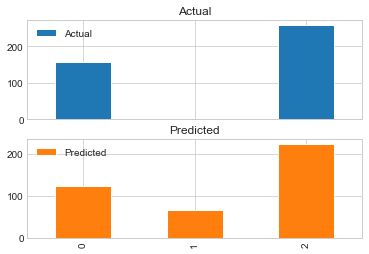

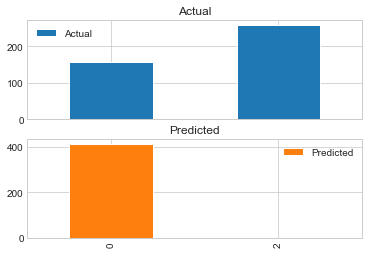

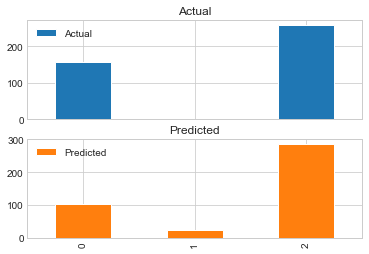

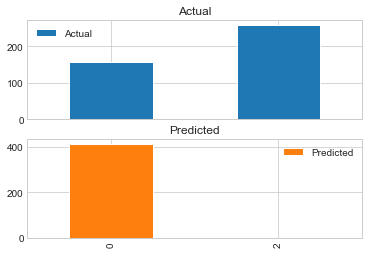

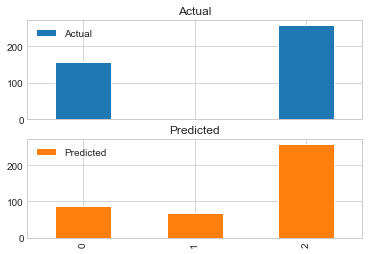

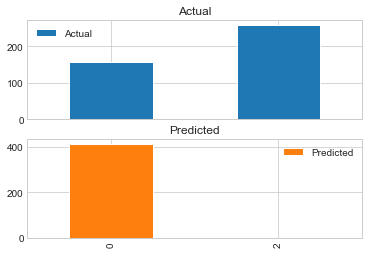

In [68]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type','Tuning']
results = list()
tuning =[True,False]
types = ['RSSI Only','Rolling Mean RSSI','Both']
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
        testX_data = test_X_rssi_home_asus
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
        testX_data = test_X_rolling_mean_home_asus
    else:
        trainX_data = combination_features_X
        testX_data = test_combination_features_X_home_asus
    scaler = StandardScaler()
    scaler.fit(trainX_data)
    testX_data = scaler.transform(testX_data)
    for tune in tuning:
        if tune == True:
            model = SVC(C=selected_c_parameter,kernel=selected_kernel,gamma=selected_gamma,
                                  decision_function_shape=selected_decision,random_state = 42)
        else: 
            model = SVC()
        trainX_data = scaler.transform(trainX_data)
        model.fit(trainX_data,train_Y.ravel())
        predicted = model.predict(testX_data)
        matrix = confusion_matrix(test_Y_home_asus.ravel(), predicted)
        report = classification_report(test_Y_home_asus.ravel(), predicted,output_dict=True)
        accuracy = accuracy_score(test_Y_home_asus.ravel(),predicted)
        statistical_array = list()
        statistics = pd.DataFrame(report).transpose()
        error_dataframe = pd.DataFrame({'Actual': test_Y_home_asus.flatten(), 'Predicted':predicted.flatten()})
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
        error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
        result = pd.DataFrame(train_Y,columns=["zone"]).join(error)
        data = structure_data(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean())
        data.append(feature)
        data.append(tune)
        results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
final_results.append(statistics.sort_values(by=['f1-score'],ascending=False).head(1).values[0])

### Results Display

,mae,mse,rmse,precision,accuracy,f1-score,type,Tuning
0,0.213797,0.213797,0.462382,0.785848,0.786203,0.769329,Both,None
2,0.220521,0.220521,0.469597,0.657737,0.779479,0.632368,Rolling Mean RSSI,True
3,0.219277,0.219277,0.468270,0.650649,0.780723,0.611955,Rolling Mean RSSI,True
4,0.302539,0.302539,0.550036,0.595342,0.697461,0.561080,Rolling Mean RSSI,True
1,0.363884,0.363884,0.603228,0.519308,0.636116,0.538411,Rolling Mean RSSI,True


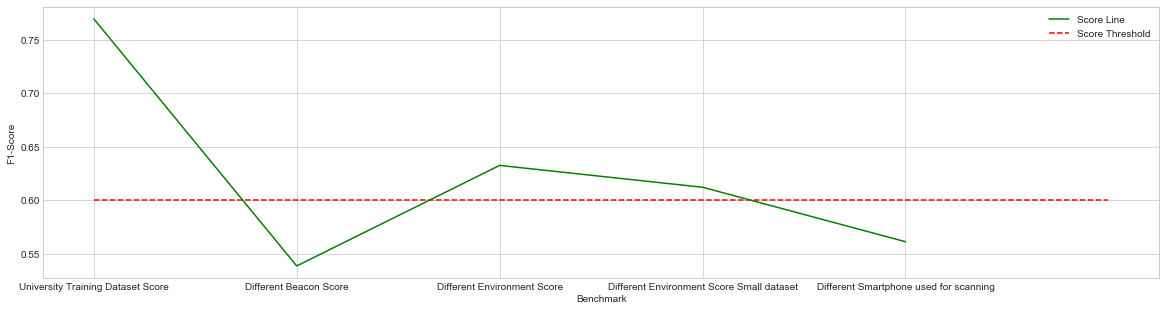

In [71]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type','Tuning']
types = ['University Training Dataset Score','Different Beacon Score','Different Environment Score','Different Environment Score Small dataset',
        "Different Smartphone used for scanning"]
results = pd.DataFrame(data=final_results,columns=statistical_cols)
display(results.sort_values(by=['f1-score'],ascending=False))
plt.figure(figsize=(20,5))
plt.plot(types,results['f1-score'],color='green',label='Score Line')
plt.hlines(0.6,0,5,color='red',label='Score Threshold',linestyles='dashed')
plt.xlabel('Benchmark')
plt.ylabel('F1-Score')
plt.legend(loc='upper right');
plt.show()